# 我所理解的支持向量机2-核函数的应用

这是我在知乎专栏：[ThinkStats](https://zhuanlan.zhihu.com/understand) 上的文章 [我所理解的 SVM 2——核函数的应用](https://zhuanlan.zhihu.com/p/24291579?refer=understand) 所用到的一些代码，请在 [GPL 3.0 及以上](https://www.gnu.org/licenses/quick-guide-gplv3.html) 的协议下自由使用。

## 先调入需要的模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sb
%matplotlib inline

## 生成几个数据点 

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


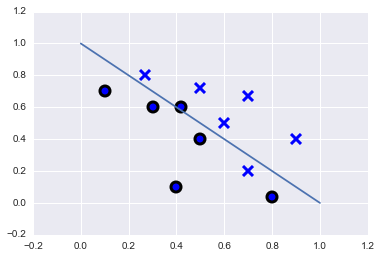

In [2]:
data = np.array([
    [0.1, 0.7],
    [0.3, 0.6],
    [0.4, 0.1],
    [0.5, 0.4],
    [0.8, 0.04],
    [0.42, 0.6],
    [0.9, 0.4],
    [0.6, 0.5],
    [0.7, 0.2],
    [0.7, 0.67],
    [0.27,0.8],
    [0.5, 0.72]
    ])
    

target = [1] * 6 + [0] * 6

x_line = np.linspace(0, 1, 100)
y_line = 1 - x_line
plt.scatter(data[:6, 0], data[:6, 1], marker='o', s=100, lw=3)
plt.scatter(data[6:, 0], data[6:, 1], marker='x', s=100, lw=3)
plt.plot(x_line, y_line)

#### 可以看出无法线性区分

## 定义计算域、文字说明等

In [3]:
C = 0.0001  # SVM regularization parameter, since Scikit-learn doesn't allow C=0
# linear_svc = svm.SVC(kernel='linear', C=C).fit(data, target)

# create a mesh to plot in
h = 0.002
x_min, x_max = data[:, 0].min() - 0.2, data[:, 0].max() + 0.2
y_min, y_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']



## RBF Kernel 

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


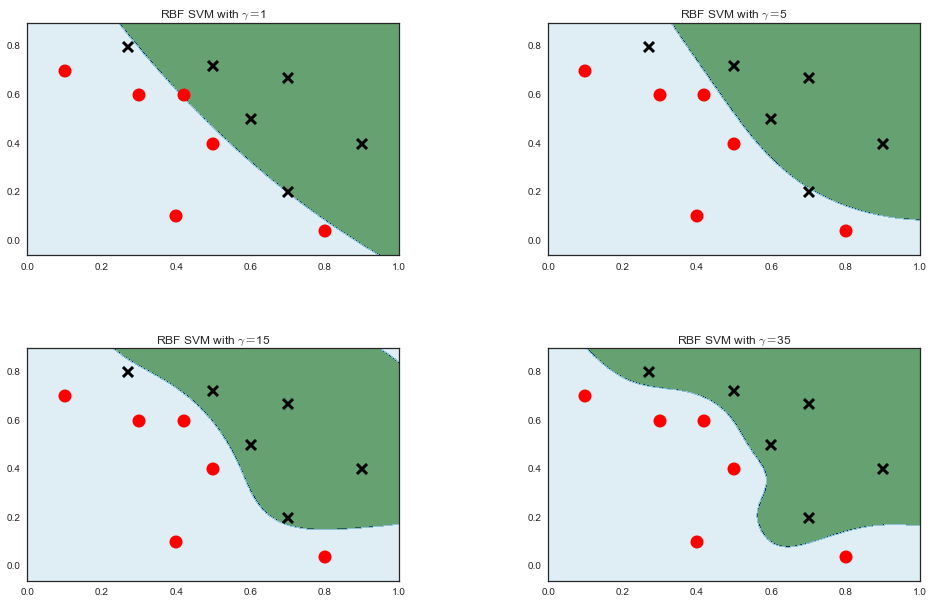

In [4]:
plt.figure(figsize=(16, 10))
sb.set_style('white')
for i, gamma in enumerate([1, 5, 15, 35]):
    rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(data, target)
    
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
#     plt.plot(xx[0, :], Z.mean(axis=0))
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)

    # Plot the training points
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.xlim(xx.min() + 0.1, xx.max() - 0.1)
    plt.ylim(yy.min() + 0.1, yy.max() - 0.1)
    plt.title('RBF SVM with $\gamma=$' + str(gamma))
    
plt.savefig('RBFSVM.png', dpi=400)

## Polynomial Kernel 

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


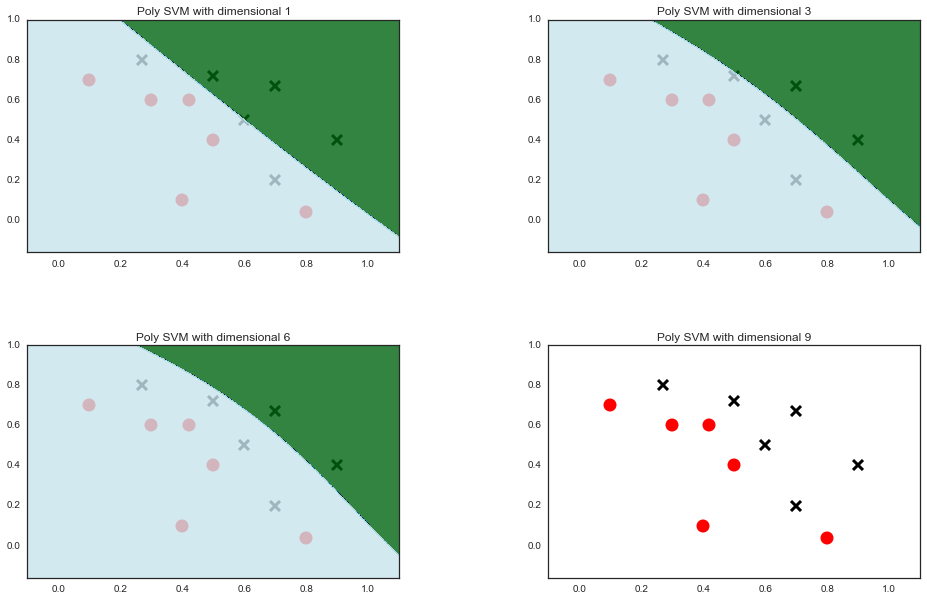

In [5]:
plt.figure(figsize=(16, 10))
for i, degree in enumerate([1, 3, 6, 9]):
    poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(data, target)
    
    Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.8)

    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
#     plt.plot(xx[0, :], Z.mean(axis=0))

    # Plot also the training points
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Poly SVM with dimensional ' + str(degree))
    
plt.savefig("PolySVM.png", dpi=400)